In [1]:
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the compressed data from .npy files
compressed_train = np.load('compressed_mnist_train.npy')
compressed_test = np.load('compressed_mnist_test.npy')
train_labels = np.load('train_labels.npy')
test_labels = np.load('test_labels.npy')

cls1 = [4, 3, 2, 0, 1, 0]
cls2 = [9, 8, 6, 3, 4, 1]
f1 = [0] * 6
f2 = [4, 1, 5, 4, 5, 1]

train_mask = (train_labels == cls1) | (train_labels == cls2)
test_mask = (test_labels == cls1) | (test_labels == cls2)
compressed_train = compressed_train[train_mask][:800]
train_labels = train_labels[train_mask][:800]
compressed_test = compressed_test[test_mask][:200]
test_labels = test_labels[test_mask][:200]

compressed_data = np.concatenate((compressed_train, compressed_test),axis=0)
combined_labels = np.concatenate((train_labels, test_labels), axis=0)
print(silhouette_score(compressed_data, combined_labels))
print(compressed_train.shape, compressed_test.shape, compressed_data.shape)
print(train_labels.shape, test_labels.shape, combined_labels.shape)

0.5261338320441901
(800, 6) (200, 6) (1000, 6)
(800,) (200,) (1000,)


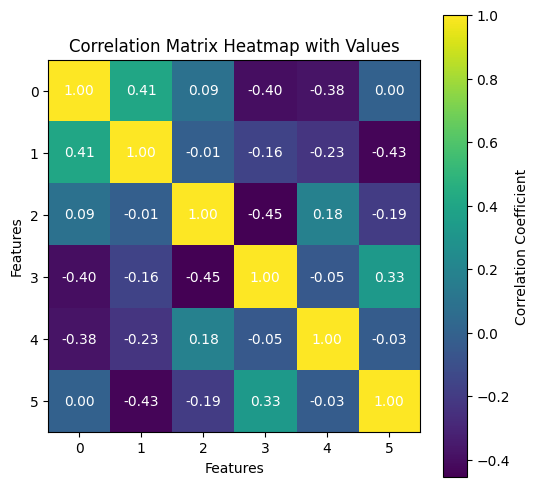

In [2]:


# Set print options to display floats with two decimal places
np.set_printoptions(precision=2, suppress=True)

# Compute correlation matrix for all 10 features
correlation_matrix = np.corrcoef(compressed_data, rowvar=False)

# Plot the heatmap with correlation coefficients displayed on the blocks
plt.figure(figsize=(6,6))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

# Display the numbers on the blocks
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='white')

plt.title('Correlation Matrix Heatmap with Values')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(range(len(correlation_matrix)), labels=range(len(correlation_matrix)))
plt.yticks(range(len(correlation_matrix)), labels=range(len(correlation_matrix)))
plt.show()


In [3]:
feature_variances = np.var(compressed_data, axis=0)
print(feature_variances)

[951928.38  64253.36 148263.57  85685.32 132778.42 156850.46]


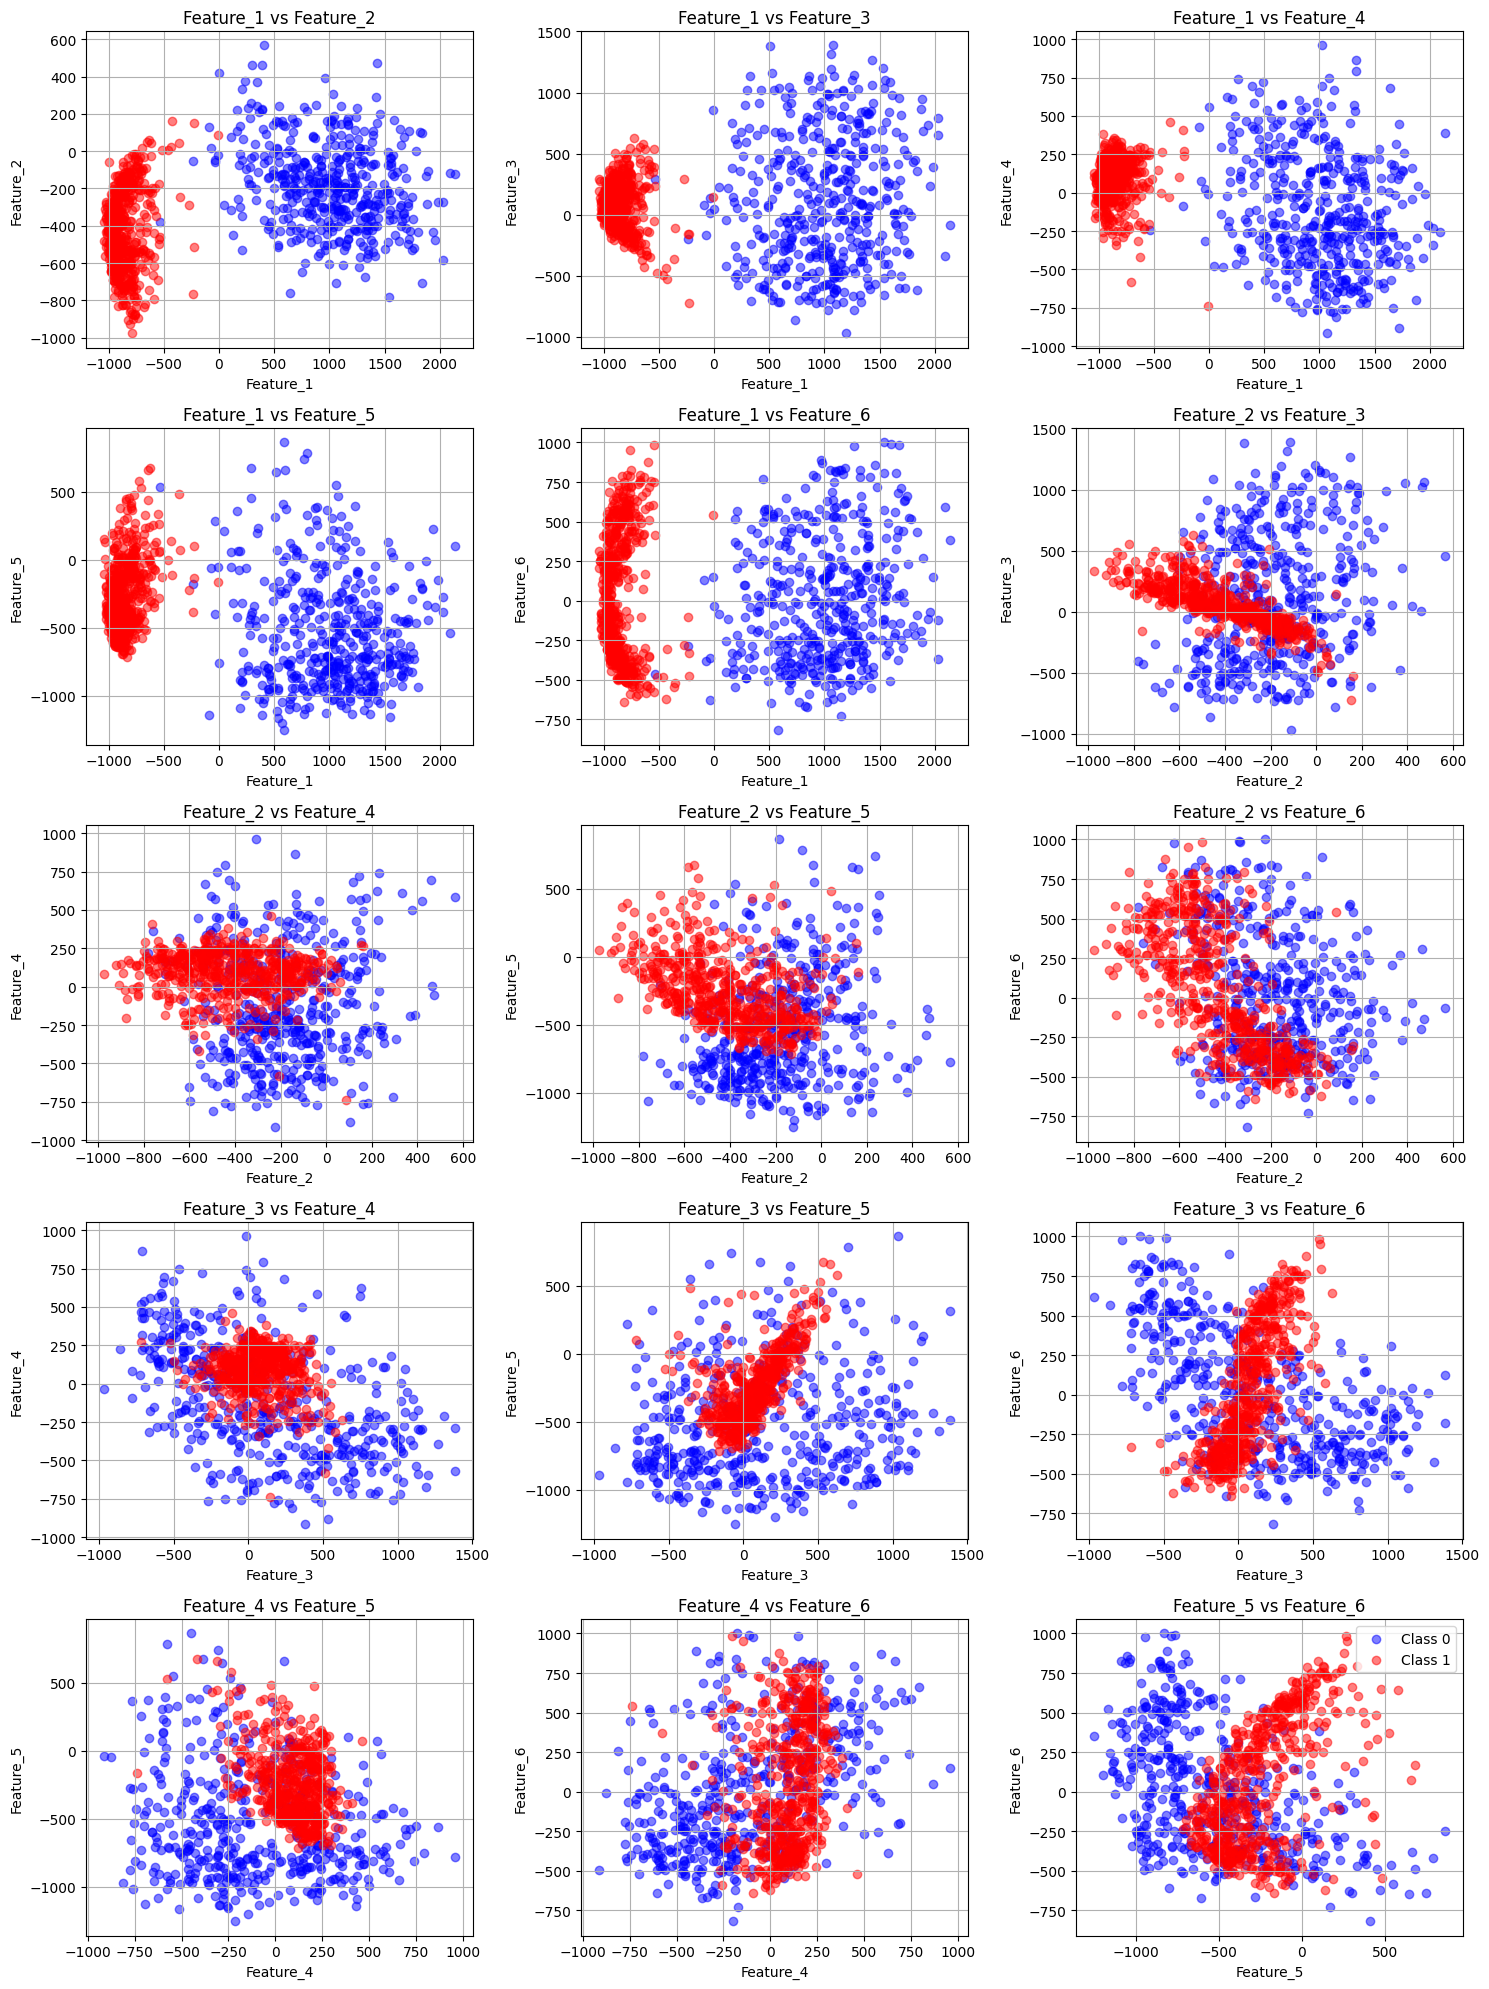

In [4]:

df_comp_data = pd.DataFrame(compressed_data, columns=[f'Feature_{i+1}' for i in range(compressed_data.shape[1])])
# Create subplots for all pairs of features
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Get all combinations of features (no repeated pairs)
feature_pairs = [(i, j) for i in range(6) for j in range(i+1, 6)]

# Plot each feature pair in a subplot
for idx, (i, j) in enumerate(feature_pairs):
    ax = axes[idx // 3, idx % 3]
    ax.scatter(df_comp_data[f'Feature_{i+1}'][combined_labels == cls1], df_comp_data[f'Feature_{j+1}'][combined_labels == cls1], c='blue', label='Class 0', alpha=0.5)
    ax.scatter(df_comp_data[f'Feature_{i+1}'][combined_labels == cls2], df_comp_data[f'Feature_{j+1}'][combined_labels == cls2], c='red', label='Class 1', alpha=0.5)
    
    ax.set_title(f'Feature_{i+1} vs Feature_{j+1}')
    ax.set_xlabel(f'Feature_{i+1}')
    ax.set_ylabel(f'Feature_{j+1}')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


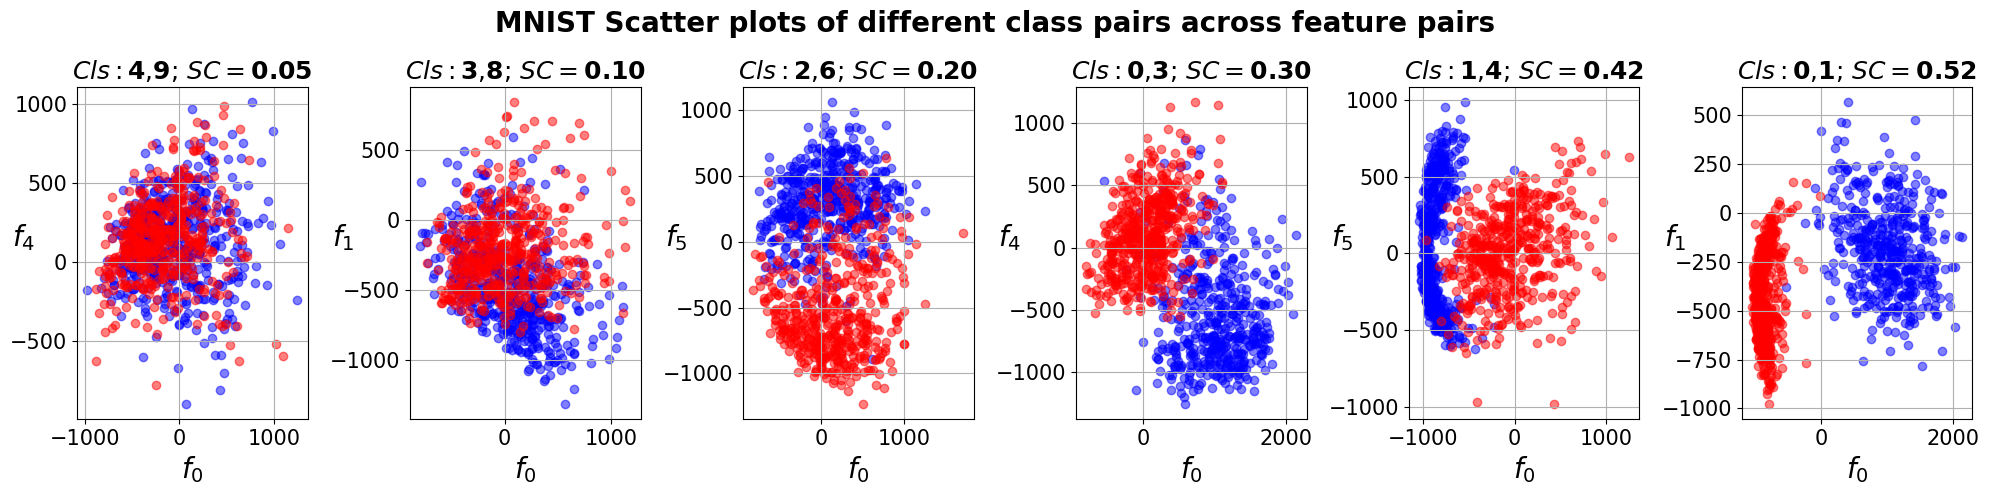

In [3]:
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the compressed data from .npy files
compressed_train = np.load('compressed_mnist_train.npy')
compressed_test = np.load('compressed_mnist_test.npy')
train_labels = np.load('train_labels.npy')
test_labels = np.load('test_labels.npy')

cls1 = [4, 3, 2, 0, 1, 0]
cls2 = [9, 8, 6, 3, 4, 1]
f1 = [0] * 6
f2 = [4, 1, 5, 4, 5, 1]
sc = [0.05, 0.1, 0.2, 0.3, 0.42, 0.52]

# Create subplots for all pairs of features
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

for i in range(6):
    train_mask = (train_labels == cls1[i]) | (train_labels == cls2[i])
    test_mask = (test_labels == cls1[i]) | (test_labels == cls2[i])
    compressed_train_new = compressed_train[train_mask][:800]
    train_labels_new = train_labels[train_mask][:800]
    compressed_test_new = compressed_test[test_mask][:200]
    test_labels_new = test_labels[test_mask][:200]

    compressed_data = np.concatenate((compressed_train_new, compressed_test_new),axis=0)
    combined_labels = np.concatenate((train_labels_new, test_labels_new), axis=0)
    # print(silhouette_score(compressed_data, combined_labels))
    # print(compressed_train.shape, compressed_test.shape, compressed_data.shape)
    # print(train_labels.shape, test_labels.shape, combined_labels.shape)

    df_comp_data = pd.DataFrame(compressed_data, columns=[f'Feature_{i+1}' for i in range(compressed_data.shape[1])])

    # Plot specific feature for each class pair
    ax = axes[i]
    ax.scatter(df_comp_data[f'Feature_{f1[i]+1}'][combined_labels == cls1[i]], df_comp_data[f'Feature_{f2[i]+1}'][combined_labels == cls1[i]], c='blue', label='Class 0', alpha=0.5)
    ax.scatter(df_comp_data[f'Feature_{f1[i]+1}'][combined_labels == cls2[i]], df_comp_data[f'Feature_{f2[i]+1}'][combined_labels == cls2[i]], c='red', label='Class 1', alpha=0.5)
    
    # ax.set_title(f'Cls: {cls1[i]}, {cls2[i]}; SC={sc[i]}',fontsize=15)
    ax.set_title(r'$\mathit{Cls:}$'+ r'$\mathbf{' + f'{cls1[i]}' + r'}$' + ',' + r'$\mathbf{' + f'{cls2[i]}' + r'}$' + '; ' + r'$\mathit{SC=}$' + r'$\mathbf{' + f'{sc[i]:.2f}' + r'}$', fontsize=18)

    ax.set_xlabel(f'$\\mathit{{f_{{{f1[i]}}}}}$', fontsize=20)
    ax.set_ylabel(f'$\\mathit{{f_{{{f2[i]}}}}}$', fontsize=20, rotation=0, labelpad=-10)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=15)


# Add a main title above all subplots
plt.suptitle("MNIST Scatter plots of different class pairs across feature pairs", fontsize=20, fontweight='bold')

# Adjust layout and add legend only once
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust rect to make room for the suptitle

plt.savefig("MNIST_varying_SS_noiseless.pdf", dpi=600, format="pdf", bbox_inches="tight")
plt.show()
    